In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_csv(r"C:\Users\Cristian Lopez\Downloads\Anexo2DatasetVehicle\CAR.csv")


In [3]:
data.head(40)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [4]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


Text(0.5, 1.0, 'Identificación de valores faltantes y atípicos')

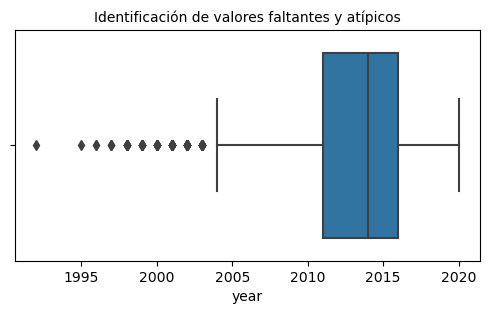

In [5]:
plt.figure(figsize=( 6, 3))
sns.boxplot(x=data['year'])
plt.title('Identificación de valores faltantes y atípicos', fontsize=10)

In [6]:
 print("cantidad de Registro con cero: ",data ['year'].isin([0]).sum())


cantidad de Registro con cero:  0


Text(0.5, 1.0, 'Identificación de valores faltantes y atípicos')

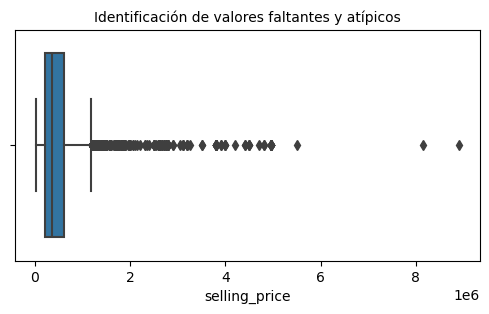

In [7]:
plt.figure(figsize=( 6, 3))
sns.boxplot(x=data['selling_price'])
plt.title('Identificación de valores faltantes y atípicos', fontsize=10)

In [8]:
 print("cantidad de Registro con cero: ",data ['selling_price'].isin([0]).sum())

cantidad de Registro con cero:  0


Text(0.5, 1.0, 'Identificación de valores faltantes y atípicos')

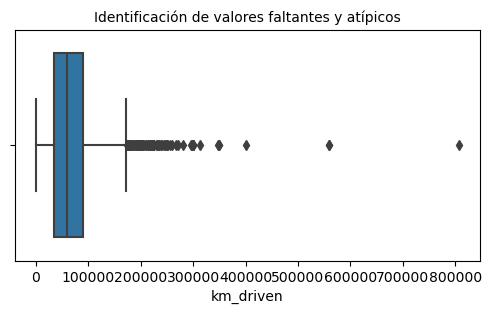

In [9]:
plt.figure(figsize=( 6, 3))
sns.boxplot(x=data['km_driven'])
plt.title('Identificación de valores faltantes y atípicos', fontsize=10)

In [10]:
 print("cantidad de Registro con cero: ",data ['km_driven'].isin([0]).sum())

cantidad de Registro con cero:  0


Text(0.5, 1.0, 'Identificación de valores faltantes y atípicos')

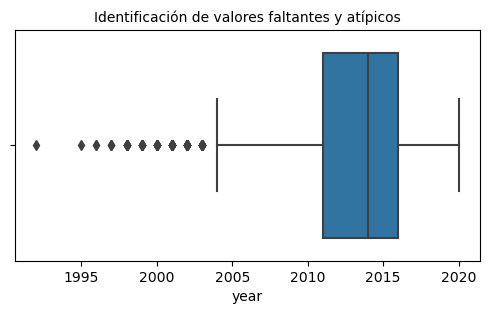

In [11]:
plt.figure(figsize=( 6, 3))
sns.boxplot(x=data['year'])
plt.title('Identificación de valores faltantes y atípicos', fontsize=10)

In [12]:
nivel_minimo=1890
nivel_maximo=2025
Total_Atipicos=((data['year']<nivel_minimo)|(data['year']>nivel_maximo)).sum()
print("El total de atipicos es{}".format(Total_Atipicos))

El total de atipicos es0


In [13]:
data=data[(data['year']<nivel_maximo)&(data['year']>nivel_minimo)]

In [14]:
Total_Atipicos=((data['year']<nivel_minimo)|(data['year']>nivel_maximo)).sum()
print("El total de valores atipicos es {}".format(Total_Atipicos))

El total de valores atipicos es 0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [16]:
data['selling_price'].value_counts()

selling_price
300000     162
250000     125
350000     122
550000     107
600000     103
          ... 
2100000      1
828999       1
1119000      1
746000       1
865000       1
Name: count, Length: 445, dtype: int64

In [17]:
data[['selling_price']].head(40)

,selling_price
0,60000
1,135000
2,600000
3,250000
4,450000
5,140000
6,550000
7,240000
8,850000
9,365000


In [18]:
categorical_columns = ['name', 'fuel', 'seller_type', 'transmission', 'owner']

data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


X = data_encoded.drop('selling_price', axis=1)


Y = data_encoded['selling_price']

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [20]:
# Crea una instancia del modelo de regresión lineal
modelo_regresion = LinearRegression()





In [21]:
# Entrena el modelo de regresión lineal
modelo_regresion.fit(X_train, Y_train)

LinearRegression()

In [22]:
# Realiza predicciones en el conjunto de prueba
predicciones = modelo_regresion.predict(X_test)

In [23]:
print(X_train)

      year  km_driven  name_Ambassador Classic 2000 Dsz  \
66    2014      92000                             False   
188   2016      70000                             False   
219   2012      54000                             False   
2034  2019      24000                             False   
835   2016      80000                             False   
...    ...        ...                               ...   
1033  2013      58500                             False   
3264  2012     110000                             False   
1653  2016      22000                             False   
2607  2015      70000                             False   
2732  2013      62000                             False   

      name_Ambassador Grand 1800 ISZ MPFI PW CL  name_Audi A4 1.8 TFSI  \
66                                        False                  False   
188                                       False                  False   
219                                       False                  Fals

In [24]:
print (Y_train)

66       525000
188      650000
219      235000
2034    1250000
835      900000
         ...   
1033    1300000
3264     120000
1653     270000
2607     600000
2732     229999
Name: selling_price, Length: 3255, dtype: int64


In [25]:
print(Y_test)

2089     465000
1077    1580000
1495     150000
555     4950000
2615     125000
         ...   
249      500000
3540     465000
3247     350000
535      295000
509      600000
Name: selling_price, Length: 1085, dtype: int64


In [26]:
print(predicciones)

[5.21101311e+05 1.58000000e+06 6.50557042e+04 ... 1.29370284e+11
 2.69931831e+05 6.07232180e+05]


In [27]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcula el error cuadrático medio (MSE)
mse = mean_squared_error(Y_test, predicciones)
print("Error Cuadrático Medio (MSE):", mse)

# Calcula el coeficiente de determinación (R-cuadrado)
r2 = r2_score(Y_test, predicciones)
print("Coeficiente de Determinación (R^2):", r2)

Error Cuadrático Medio (MSE): 1.364935664285304e+23
Coeficiente de Determinación (R^2): -385994063347.28516


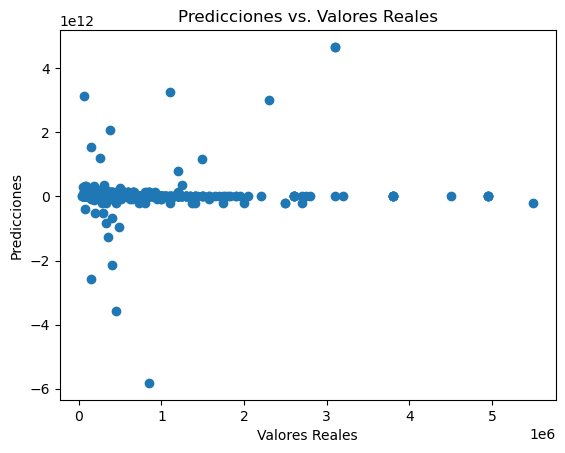

In [28]:
plt.scatter(Y_test, predicciones)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs. Valores Reales")
plt.show()

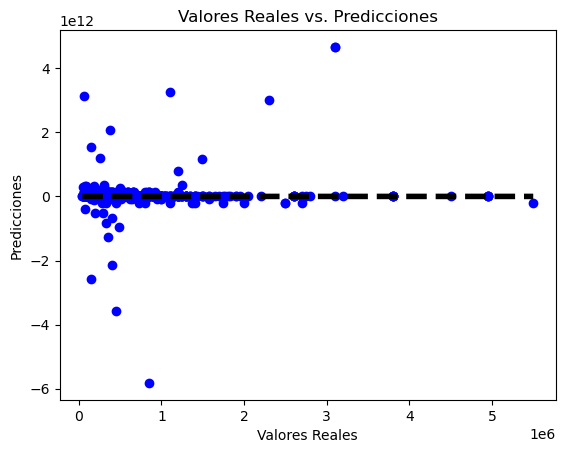

In [29]:
plt.scatter(Y_test, predicciones, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')
plt.show()